In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 110kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=6a1b5150d9c2aae6228b84e74e41fe5ed4409e6c22e478ec324dd2d9e80484f4
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


<function matplotlib.pyplot.show>

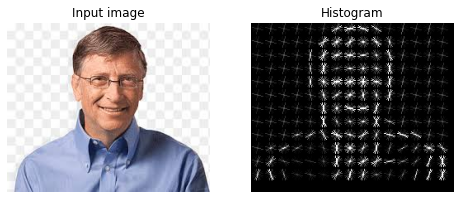

In [8]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2
img=cv2.imread('/content/download.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fd,hog_image=hog(img,orientations=8,pixels_per_cell=(16,16),
                 cells_per_block=(1,1),visualize=True,multichannel=True)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(img,cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram')
plt.show

In [10]:
len(fd)

1440

In [6]:
import face_recognition


import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline


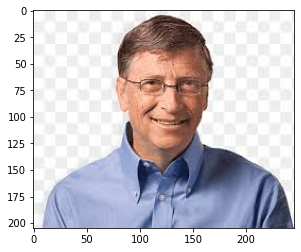

In [9]:
img=cv2.imread('/content/download.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [11]:
face_locations = face_recognition.face_locations(img)
number_of_faces=len(face_locations)
print("Found {} face(s)".format(number_of_faces))

Found 1 face(s)


Face Detection


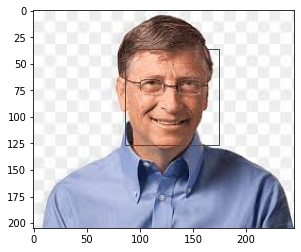

In [12]:
plt.imshow(img)
ax= plt.gca()
for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h= left,top,right,bottom
  rect=Rectangle((x,y), w-x, h-y,fill=False,color='red')
  ax.add_patch(rect)
plt.show()



Face Recognition

In [34]:
img=cv2.imread('download.jpg')
download=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=cv2.imread('modi.jpg')
modi=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=cv2.imread('obama.jpg')
obama=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=cv2.imread('priyanka.jpg')
priyanka=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [35]:
download_encoding=face_recognition.face_encodings(download)[0]
modi_encoding=face_recognition.face_encodings(modi)[0]
obama_encoding=face_recognition.face_encodings(obama)[0]
priyanka_encoding=face_recognition.face_encodings(priyanka)[0]

known_face_encodings=[
                     download_encoding,
                     modi_encoding,
                     obama_encoding,
                      priyanka_encoding
                    
]

Unkown Image

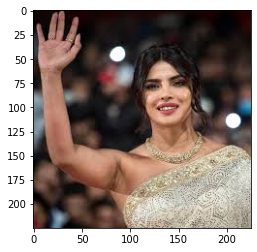

In [36]:
image=cv2.imread('priyanka2.jpg')
unknown_img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_img)
unknown_face_encodings=face_recognition.face_encodings(unknown_img)

In [38]:
from scipy.spatial import distance 

for unknown_face_encoding in unknown_face_encodings:
  results=[]
  for known_face_encoding in known_face_encodings:
    d=distance.euclidean(known_face_encoding,unknown_face_encoding)
    print('Distance',d)
    results.append(d)
  threshold=0.6
  results=np.array(results)<= threshold

  name='Unknown'

  if results[0]:
    name="Bill Gates"
  elif results[1]:
    name="Narendra Modi"
  elif results[2]:
    name="Barack Obama"
  elif results[3]:
    name="Priyanka Chopra"

  print(f"Found {name} in database")



Distance 0.88308826866164
Distance 0.8756119325664417
Distance 0.9366729017371679
Distance 0.43634203209718797
Found Priyanka Chopra in database
